In [4]:
import scipy
from scipy.optimize.minpack import curve_fit
import numpy 
import matplotlib.pyplot

In [13]:
#define the fit function
def model_func(x, a, b, c, d):
    return a*numpy.sin(b*x +c) * numpy.exp(-x/d)

def fit_sin(x, y):
    opt_parms, parm_cov = scipy.optimize.minpack.curve_fit(model_func, x, y, p0=(3000,200000,1,0.00001))#might need to vry these starting parametres
    A, B, C, D = opt_parms
    perr = [numpy.sqrt(numpy.diag(parm_cov))]
    return A, B, C, D, perr

coefficient T is 0.00016197227828190354
180 degree pulse time is 3.5693760691728404e-05
90 degree pulse time is 1.7846880345864202e-05


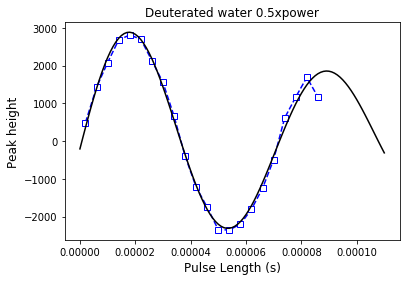

In [14]:
#Read the data
data1=numpy.loadtxt(fname='D2O_180pulse_ax05.csv', delimiter=',')
t1 = (data1[:,0])
P1 = (data1[:,1])
P2 = (data1[:,2])

#fit the data
A1, B1, C1, T1, perr1 = fit_sin(t1,P1)

print ('coefficient T is', T1)
print ('180 degree pulse time is', numpy.pi/B1)
print ('90 degree pulse time is', numpy.pi/(2*B1))


#plot the data

t= numpy.arange (0,0.00011,0.000001)
fit_y1 = model_func(t, A1, B1, C1, T1)


matplotlib.pyplot.xlabel('Pulse Length (s)', fontsize=12)
matplotlib.pyplot.ylabel('Peak height', fontsize=12)
matplotlib.pyplot.title('Deuterated water 0.5xpower', fontsize=12)

matplotlib.pyplot.plot(t1, P1, linewidth=1.5, color='b', linestyle = '--', marker='s', markeredgecolor='b', markerfacecolor='white', label='measured')

matplotlib.pyplot.plot(t,fit_y1, linewidth=1.5, color='k', linestyle = '-', marker='', markeredgecolor='k', markerfacecolor='white', label='fitted')


matplotlib.pyplot.show()

In [15]:
#find the amplitude of B1
gamma =41.065
powerfrac = 0.5
Bamp = numpy.pi /(gamma*powerfrac*(numpy.pi/B1))
print (Bamp)

4286.627379916812


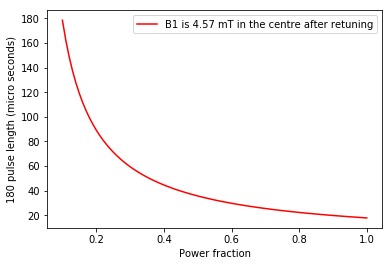

In [16]:
#plot the pulse lengths with different power levels at this tuning
Pfrac= numpy.arange(0.1,1.01,0.01)
tp = (numpy.pi/(Pfrac*Bamp*gamma))*10**6 #in microseconds

matplotlib.pyplot.plot(Pfrac,tp, linewidth=1.5, color='r', linestyle = '-', marker='', markeredgecolor='g', markerfacecolor='white', label='B1 is 4.57 mT in the centre after retuning')
matplotlib.pyplot.xlabel ('Power fraction')
matplotlib.pyplot.legend()
matplotlib.pyplot.ylabel('180 pulse length (micro seconds)')

matplotlib.pyplot.show()